In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline

In [2]:
pokemon = pd.read_csv("pokemon.csv")
pokemon.head()

,id,species,generation_id,height,weight,base_experience,type_1,type_2,hp,attack,defense,speed,special-attack,special-defense
0,1,bulbasaur,1,0.7,6.9,64,grass,poison,45,49,49,45,65,65
1,2,ivysaur,1,1.0,13.0,142,grass,poison,60,62,63,60,80,80
2,3,venusaur,1,2.0,100.0,236,grass,poison,80,82,83,80,100,100
3,4,charmander,1,0.6,8.5,62,fire,NaN,39,52,43,65,60,50
4,5,charmeleon,1,1.1,19.0,142,fire,NaN,58,64,58,80,80,65


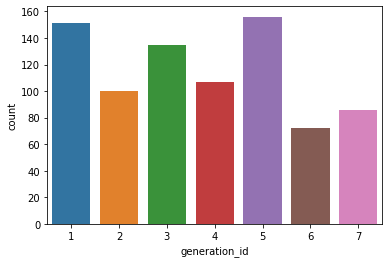

In [3]:
sb.countplot(data = pokemon, x = 'generation_id'); # ';' hiding 'plotting object information'

In [4]:
sb.color_palette()

[(0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
 (1.0, 0.4980392156862745, 0.054901960784313725),
 (0.17254901960784313, 0.6274509803921569, 0.17254901960784313),
 (0.8392156862745098, 0.15294117647058825, 0.1568627450980392),
 (0.5803921568627451, 0.403921568627451, 0.7411764705882353),
 (0.5490196078431373, 0.33725490196078434, 0.29411764705882354),
 (0.8901960784313725, 0.4666666666666667, 0.7607843137254902),
 (0.4980392156862745, 0.4980392156862745, 0.4980392156862745),
 (0.7372549019607844, 0.7411764705882353, 0.13333333333333333),
 (0.09019607843137255, 0.7450980392156863, 0.8117647058823529)]

In [5]:
base_color = sb.color_palette()[0]  # Selecting single color

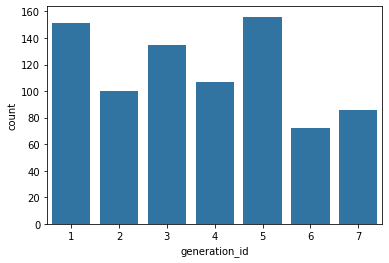

In [6]:
sb.countplot(data = pokemon, x = 'generation_id', color = base_color);

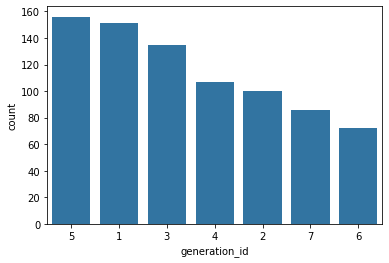

In [7]:
sb.countplot(data = pokemon, x = 'generation_id', color = base_color, order = [5,1,3,4,2,7,6]);   # manually choose order and column

In [8]:
type_counts = pokemon.groupby('generation_id').id.count().sort_values()
type_order = type_counts.index

In [9]:
type_order

Int64Index([6, 7, 2, 4, 3, 1, 5], dtype='int64', name='generation_id')

In [10]:
type_order = type_order[::-1]   # reverse
type_order

Int64Index([5, 1, 3, 4, 2, 7, 6], dtype='int64', name='generation_id')

In [11]:
type_order = pokemon.generation_id.value_counts().index
type_order

Int64Index([5, 1, 3, 4, 2, 7, 6], dtype='int64')

In [12]:
type_counts = pokemon.type_1.value_counts()
type_counts

water       114
normal      105
grass        78
bug          72
psychic      53
fire         53
rock         46
electric     40
poison       34
ground       32
dark         29
fighting     29
dragon       27
ghost        27
steel        24
ice          23
fairy        18
flying        3
Name: type_1, dtype: int64

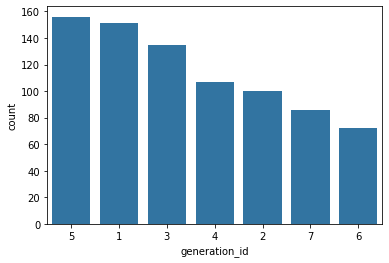

In [13]:
sb.countplot(data = pokemon, x = 'generation_id', color = base_color, order = type_order); 

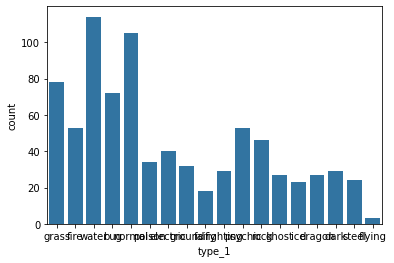

In [14]:
sb.countplot(data = pokemon, x = 'type_1', color = base_color); 

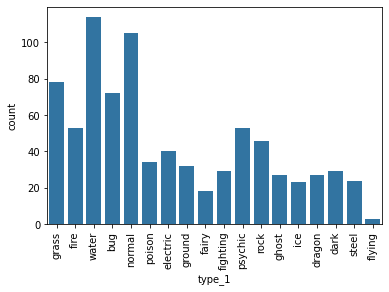

In [15]:
sb.countplot(data = pokemon, x = 'type_1', color = base_color); 
plt.xticks(rotation = 90); # rotate category label

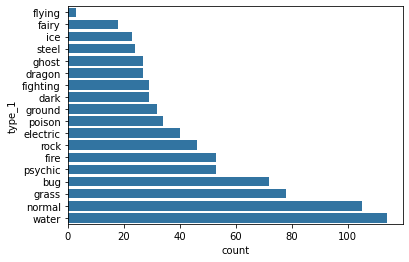

In [16]:
orders = pokemon.type_1.value_counts().index
orders = orders[::-1]

sb.countplot(data = pokemon, y = 'type_1', color = base_color, order = orders);  # barh effect

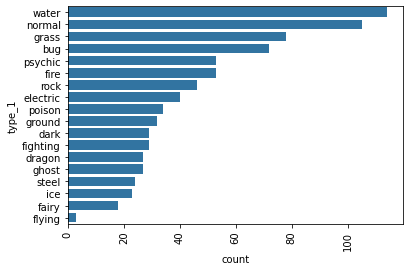

In [17]:
orders = pokemon.type_1.value_counts().index
orders 
sb.countplot(data = pokemon, y = 'type_1', color = base_color, order = orders);  # barh effect
plt.xticks(rotation = 90); # rotate category label

In [18]:
pokemon.shape

(807, 14)

In [19]:
type_counts

water       114
normal      105
grass        78
bug          72
psychic      53
fire         53
rock         46
electric     40
poison       34
ground       32
dark         29
fighting     29
dragon       27
ghost        27
steel        24
ice          23
fairy        18
flying        3
Name: type_1, dtype: int64

In [20]:
type_counts

water       114
normal      105
grass        78
bug          72
psychic      53
fire         53
rock         46
electric     40
poison       34
ground       32
dark         29
fighting     29
dragon       27
ghost        27
steel        24
ice          23
fairy        18
flying        3
Name: type_1, dtype: int64

In [21]:
type_counts[0]

114

In [22]:
n_pokemon = pokemon.shape[0]
max_type_count = type_counts[0] # the number of WATER
max_prop = max_type_count / n_pokemon
print(max_prop)

0.1412639405204461


In [23]:
tick_props = np.arange(0, max_prop, 0.02) # arange(start, end, interval)
tick_props

array([0.  , 0.02, 0.04, 0.06, 0.08, 0.1 , 0.12, 0.14])

In [24]:
tick_names = ['{:0.2f}'.format(v) for v in tick_props]  # make float 0.xx - two decimal places
tick_names

['0.00', '0.02', '0.04', '0.06', '0.08', '0.10', '0.12', '0.14']

In [30]:
tick_props

array([0.  , 0.02, 0.04, 0.06, 0.08, 0.1 , 0.12, 0.14])

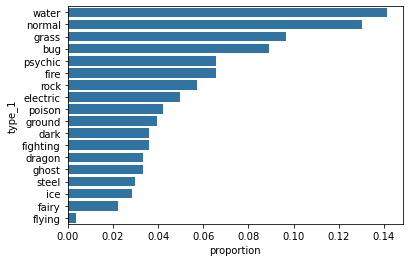

In [31]:
sb.countplot(data = pokemon, y = 'type_1', color = base_color, order = orders); 
plt.xticks(n_pokemon * tick_props, tick_names);    # xticks(locadtion on the x-axis, labels)
plt.xlabel('proportion');

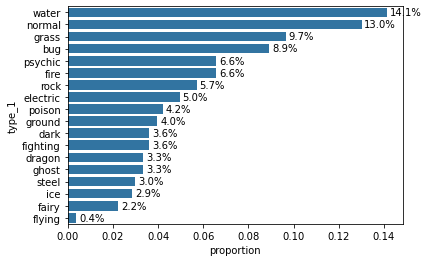

In [36]:
sb.countplot(data = pokemon, y = 'type_1', color = base_color, order = orders); 
plt.xticks(n_pokemon * tick_props, tick_names);    # xticks(locadtion on the x-axis, labels)
plt.xlabel('proportion');

for i in range(type_counts.shape[0]):
    count = type_counts[i]
    pct_string = '{:0.1f}%'.format(100 * count/n_pokemon)
    plt.text(count + 1, i, pct_string, va = 'center'); 


In [33]:
type_counts.shape[0]

18

In [34]:
type_counts

water       114
normal      105
grass        78
bug          72
psychic      53
fire         53
rock         46
electric     40
poison       34
ground       32
dark         29
fighting     29
dragon       27
ghost        27
steel        24
ice          23
fairy        18
flying        3
Name: type_1, dtype: int64

In [37]:
pokemon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 807 entries, 0 to 806
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               807 non-null    int64  
 1   species          807 non-null    object 
 2   generation_id    807 non-null    int64  
 3   height           807 non-null    float64
 4   weight           807 non-null    float64
 5   base_experience  807 non-null    int64  
 6   type_1           807 non-null    object 
 7   type_2           405 non-null    object 
 8   hp               807 non-null    int64  
 9   attack           807 non-null    int64  
 10  defense          807 non-null    int64  
 11  speed            807 non-null    int64  
 12  special-attack   807 non-null    int64  
 13  special-defense  807 non-null    int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 88.4+ KB


In [38]:
pokemon.head()

,id,species,generation_id,height,weight,base_experience,type_1,type_2,hp,attack,defense,speed,special-attack,special-defense
0,1,bulbasaur,1,0.7,6.9,64,grass,poison,45,49,49,45,65,65
1,2,ivysaur,1,1.0,13.0,142,grass,poison,60,62,63,60,80,80
2,3,venusaur,1,2.0,100.0,236,grass,poison,80,82,83,80,100,100
3,4,charmander,1,0.6,8.5,62,fire,NaN,39,52,43,65,60,50
4,5,charmeleon,1,1.1,19.0,142,fire,NaN,58,64,58,80,80,65


In [39]:
df = pokemon.melt(id_vars=['id', 'species'], 
                          value_vars=['type_1', 'type_2'], 
                          var_name='type_level', 
                          value_name='type')
df.head(50)

,id,species,type_level,type
0,1,bulbasaur,type_1,grass
1,2,ivysaur,type_1,grass
2,3,venusaur,type_1,grass
3,4,charmander,type_1,fire
4,5,charmeleon,type_1,fire
5,6,charizard,type_1,fire
6,7,squirtle,type_1,water
7,8,wartortle,type_1,water
8,9,blastoise,type_1,water
9,10,caterpie,type_1,bug


In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1614 entries, 0 to 1613
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          1614 non-null   int64 
 1   species     1614 non-null   object
 2   type_level  1614 non-null   object
 3   type        1212 non-null   object
dtypes: int64(1), object(3)
memory usage: 50.6+ KB
